## data loading and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url='https://drive.google.com/file/d/1P_jFdkc6FEai2W3RwcF5z5UIA60Our4Q/'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_credit = pd.read_csv(dwn_url)

In [2]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
df_credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df_credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df_credit.shape

(8950, 18)

In [6]:
df_credit.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [94]:
df_credit.dropna(inplace=True)

In [95]:
for column_name in df_credit:
    column = df_credit[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  CUST_ID  is :  0
Count of zeros in column  BALANCE  is :  6
Count of zeros in column  BALANCE_FREQUENCY  is :  6
Count of zeros in column  PURCHASES  is :  1967
Count of zeros in column  ONEOFF_PURCHASES  is :  4113
Count of zeros in column  INSTALLMENTS_PURCHASES  is :  3747
Count of zeros in column  CASH_ADVANCE  is :  4431
Count of zeros in column  PURCHASES_FREQUENCY  is :  1966
Count of zeros in column  ONEOFF_PURCHASES_FREQUENCY  is :  4113
Count of zeros in column  PURCHASES_INSTALLMENTS_FREQUENCY  is :  3746
Count of zeros in column  CASH_ADVANCE_FREQUENCY  is :  4431
Count of zeros in column  CASH_ADVANCE_TRX  is :  4431
Count of zeros in column  PURCHASES_TRX  is :  1967
Count of zeros in column  CREDIT_LIMIT  is :  0
Count of zeros in column  PAYMENTS  is :  0
Count of zeros in column  MINIMUM_PAYMENTS  is :  0
Count of zeros in column  PRC_FULL_PAYMENT  is :  5589
Count of zeros in column  TENURE  is :  0


## Hierarchical clustering 

In [101]:
data=df_credit.drop('CUST_ID',axis='columns')
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)

In [102]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,2
2,2
3,2
4,2
...,...
8631,2
8632,2
8633,2
8634,2


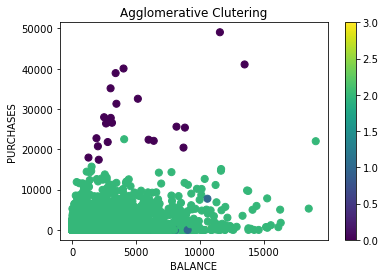

In [103]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ['PURCHASES'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
plt.colorbar(scatter)

## Dendrogram and   k-means clustering

In [107]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)
clust_l=kmeans.fit_predict(data)
KM=pd.DataFrame(clust_l)

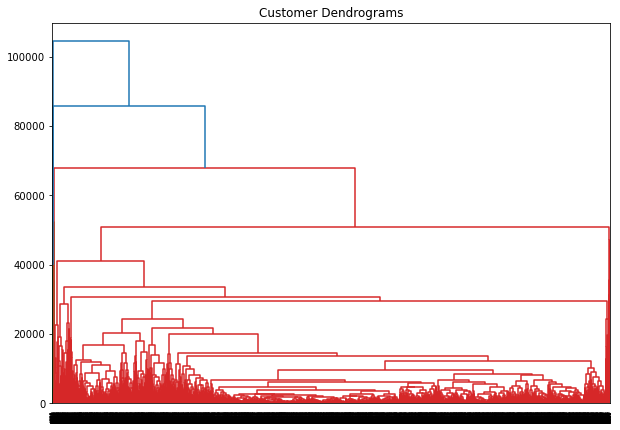

In [122]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [123]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)
clust_l=kmeans.fit_predict(data)
KM=pd.DataFrame(clust_l)

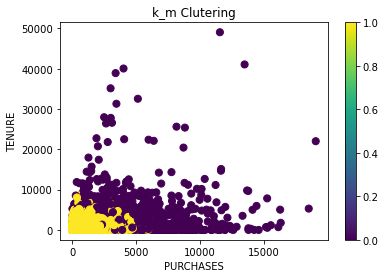

In [126]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
clust_l1=kmeans.fit_predict(data)
KM_1=pd.DataFrame(clust_l1)
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ['PURCHASES'] , c= KM_1[0], s=50)
ax.set_title("k_m Clutering")
ax.set_xlabel('PURCHASES')
ax.set_ylabel('TENURE')
plt.colorbar(scatter)

## Elbow method ( the best k value)

In [124]:
SSE=[]
for k in range(1,10):
    k_m=KMeans(n_clusters=k)
    k_m=k_m.fit(data)
    SSE.append(k_m.inertia_)

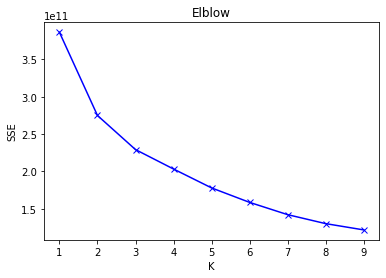

In [117]:
plt.plot(range(1,10),SSE,'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elblow')
plt.show()

# The clusters

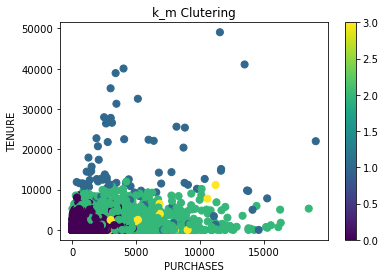

In [131]:
k_m=KMeans(n_clusters=4)
k_m=k_m.fit(data)
clust_l1=k_m.fit_predict(data)
KM_1=pd.DataFrame(clust_l1)
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ['PURCHASES'] , c= KM_1[0], s=50)
ax.set_title("k_m Clutering")
ax.set_xlabel('PURCHASES')
ax.set_ylabel('TENURE')
plt.colorbar(scatter)